Total number of prescribed antibiotic items per STAR-PU by quarter

per Clinical Commissioning Group in England (ID:92377)

NHS Targets:
2013/14=1.161 (green)
2018/19=0.965 (red)
Vertical mark: November 2015



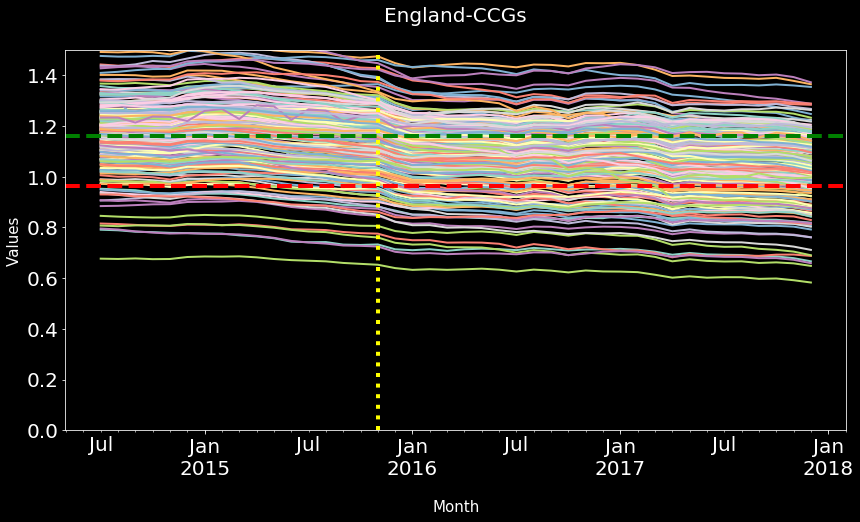

In [4]:
print ('Total number of prescribed antibiotic items per STAR-PU by quarter\n') 
print ('per Clinical Commissioning Group in England (ID:92377)')
print ('\nNHS Targets:\n2013/14=1.161 (green)\n2018/19=0.965 (red)\nVertical mark: November 2015\n')

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

#England CCGs in one chart
ccgs_92377=pd.read_csv('ccgs_92377_clean.csv',low_memory=False)
ccgs_list=ccgs_92377['CCG'].unique().tolist() #list of ccg names

ccgs_ts=pd.DataFrame() #dataframe for ccgs time series
for index, value in enumerate (ccgs_list):
        indicator_ccg=ccgs_92377[ccgs_92377['CCG']==value]
        indicator_ccg_values=indicator_ccg.loc[:,'Value']
        ccgs_ts [value]=pd.Series()
        ccgs_ts [value]=indicator_ccg_values.values #store the indicator data for all ccgs
        
#datetime index for the ccgs
datetime_index=pd.to_datetime(ccgs_92377['Timeperiod'].unique(), format='%Y-%m-%d')
ccgs_ts=ccgs_ts.set_index(datetime_index)

#time series
plt.style.use('dark_background')
with sns.color_palette("Set3", 10):
    ax=ccgs_ts.plot(figsize=(14,7), fontsize=20, linewidth=2, legend=None)
ax.set_title('England-CCGs\n', fontsize=20)
ax.set_xlabel('\nMonth', fontsize=15)
ax.set_ylabel('Values', fontsize=15)
ax.axhline(y=1.161, color='green', linestyle='--', label='2013/14 Target', linewidth=4) 
ax.axhline(y=0.965, color='red', linestyle='--', label='2018/19 Target', linewidth=4)
ax.axvline(x='Nov 2015', color='yellow', linestyle='dotted',linewidth=4) 
plt.ylim((0, 1.5))

plt.show()

In [4]:
print ('All CCGs-Individual Charts\n')
print ('CCGs are presented with reduction levels (%max-min)')

#load reduction levels (%diff) for all ccgs
diff_ccgs=pd.read_csv('diff_2014_2017_new.csv')
diff_ccgs=diff_ccgs[['Unnamed: 0','%diff.']]
diff_ccgs=diff_ccgs.rename(index=str, columns={'Unnamed: 0':'CCG'})
diff_list=diff_ccgs['%diff.']

#add reduction levels to ccgs names in column headers
ccgs_ts_headers=ccgs_ts.columns
renaming={}
for index, value in enumerate (ccgs_ts_headers):
    value1=value+' ('+str(diff_list[index])+'%)'
    renaming[value]=value1
ccgs_ts.rename(columns=renaming, inplace=True)

start=0
end=9
for i in range (9):
    if i==end:
        df_i=ccgs_ts.iloc[:, start: end]
        with sns.axes_style("darkgrid"):
            axes=df_i.plot(subplots=True,linewidth=2,layout=(3, 3),figsize=(20, 14),fontsize=10,sharex=False,sharey=True)
            for c in axes:
                for ax in c:
                    ax.axhline(y=1.161, color='green', linestyle='--', label='2013/14 Target', linewidth=0.8) 
                    ax.axhline(y=0.965, color='red', linestyle='--', label='2018/19 Target',linewidth=0.8)
                    ax.axvline(x='Nov 2015', color='orange', linestyle='dotted', linewidth=0.8) 
                    ax.ylim((0, 1.5))
        plt.show()
        start=end
        end=end+9

All CCGs-Individual Charts

CCGs are presented with reduction levels (%max-min)


All CCGs-Individual Charts

CCGs are presented with reduction levels (%max-min)


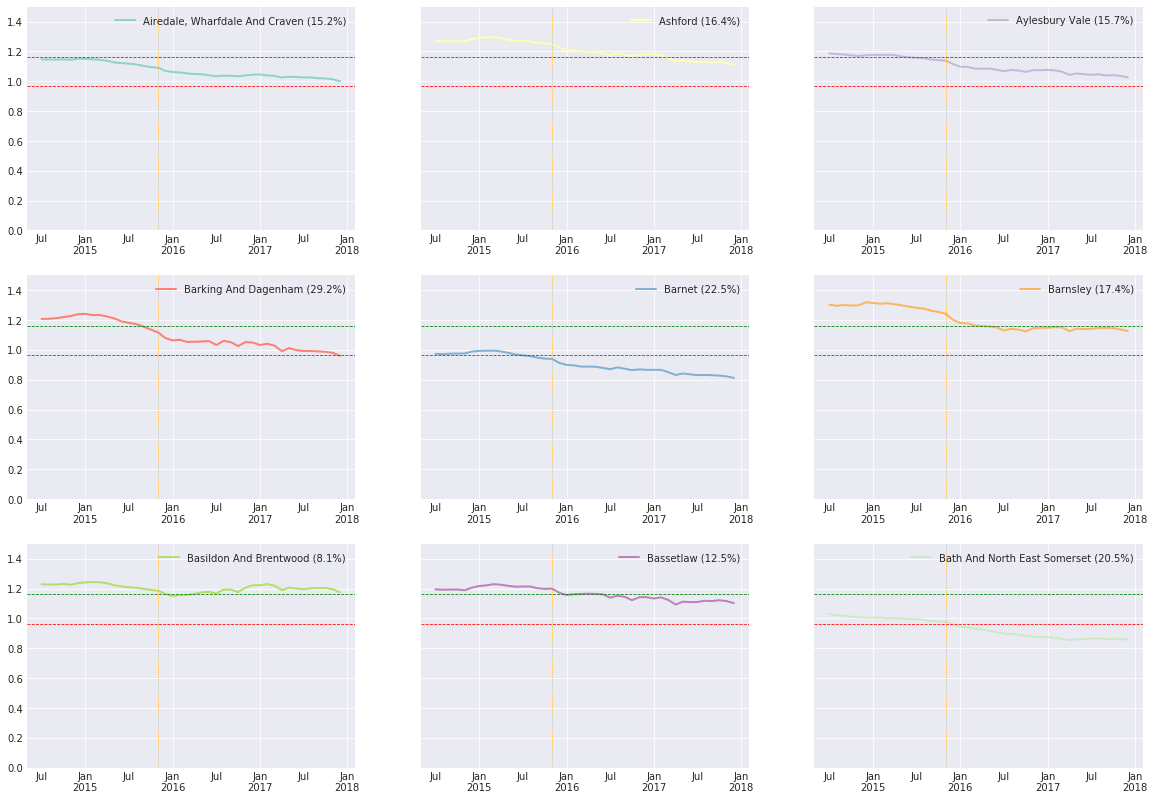

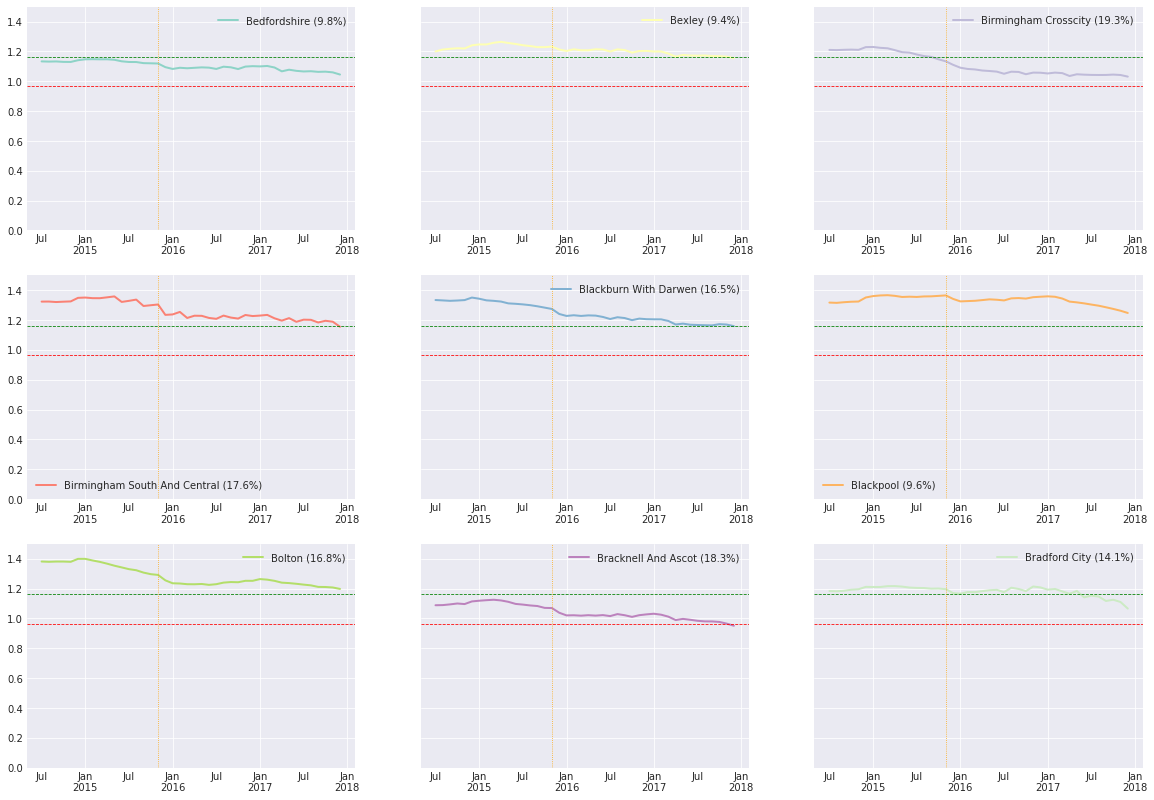

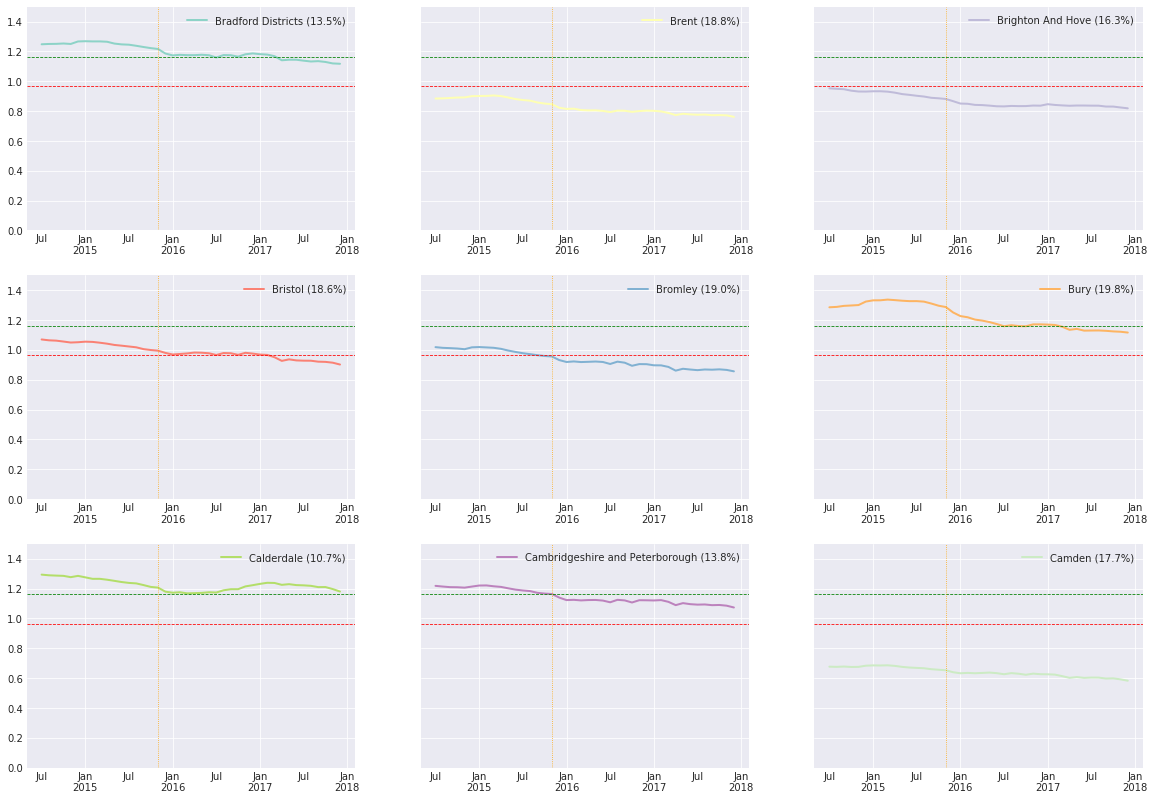

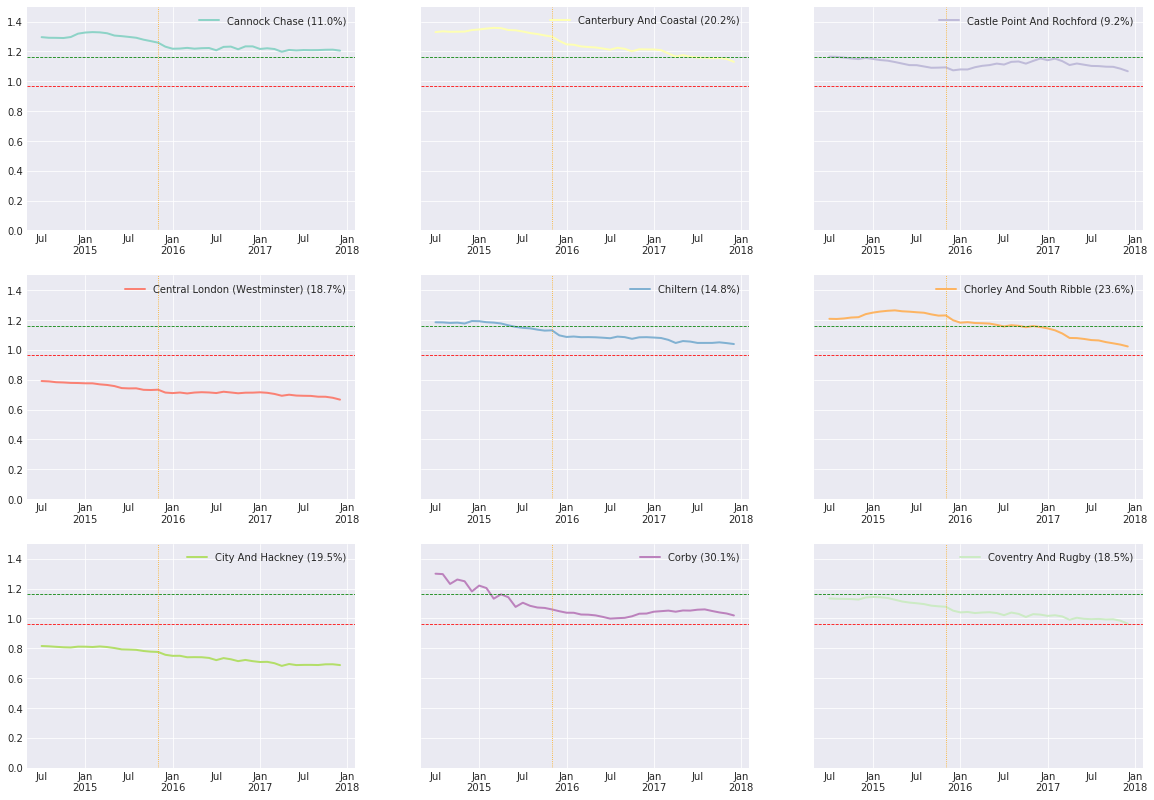

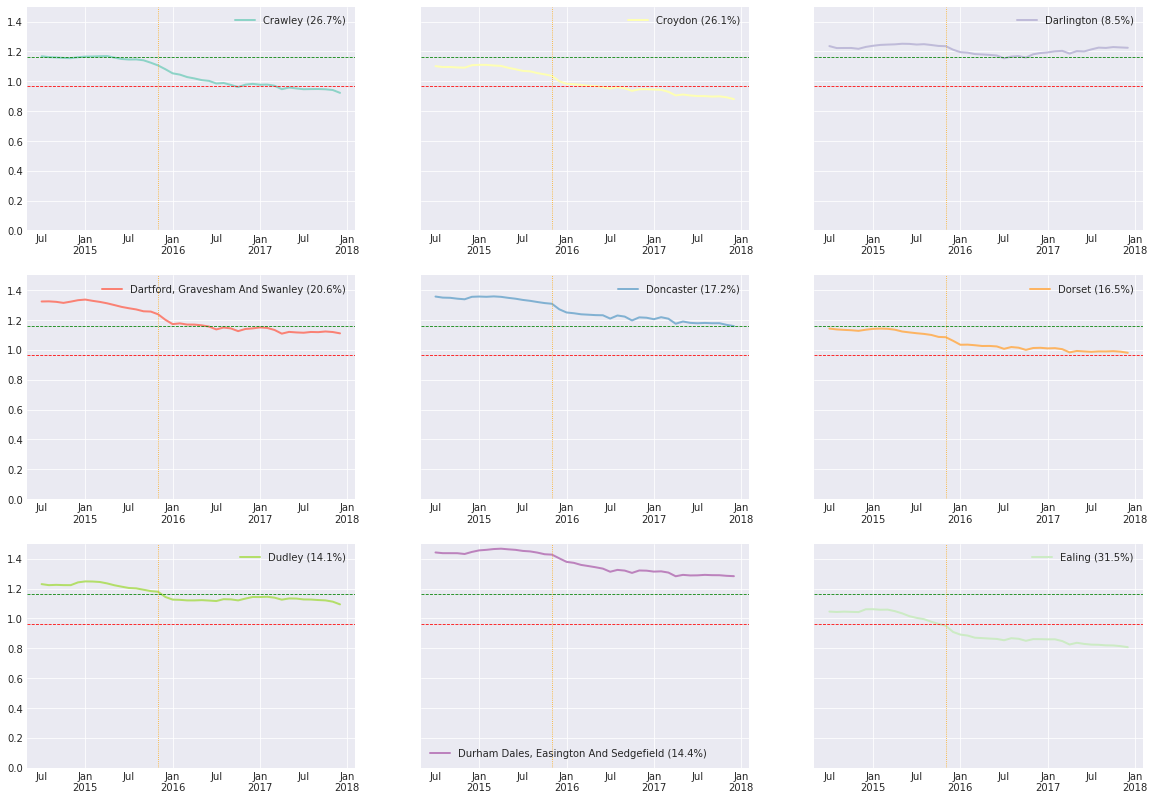

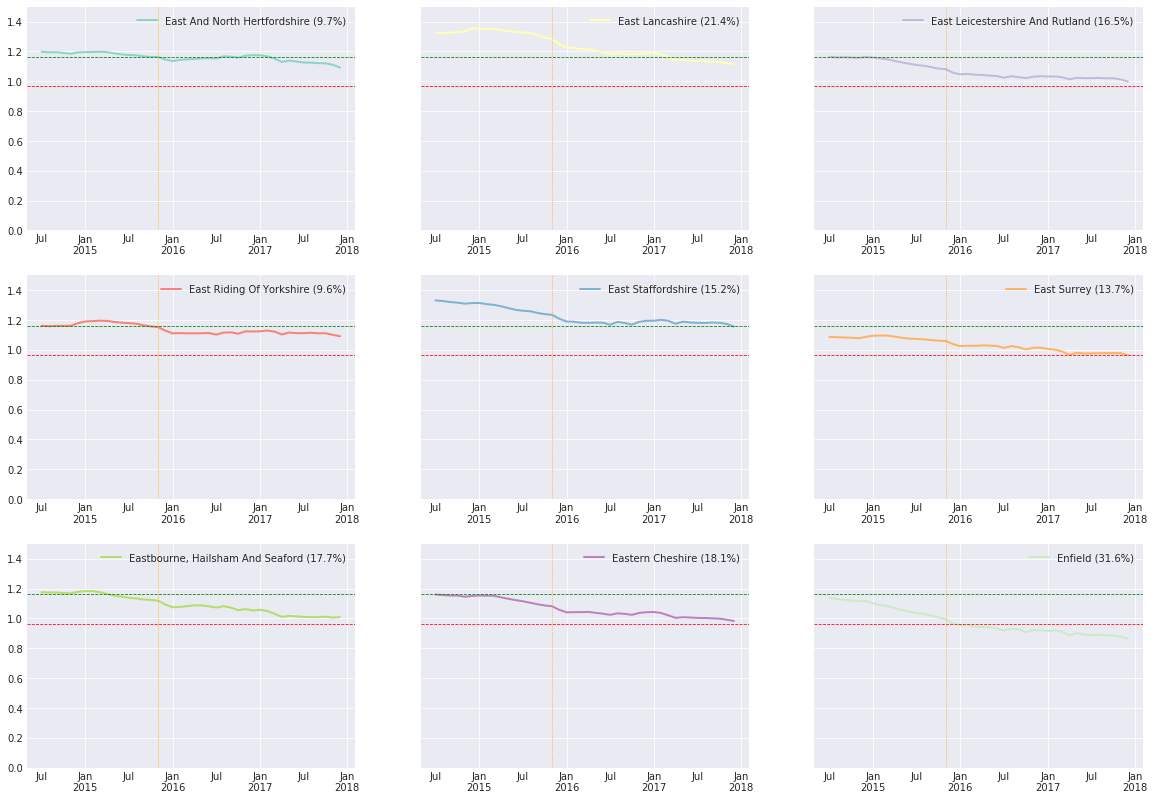

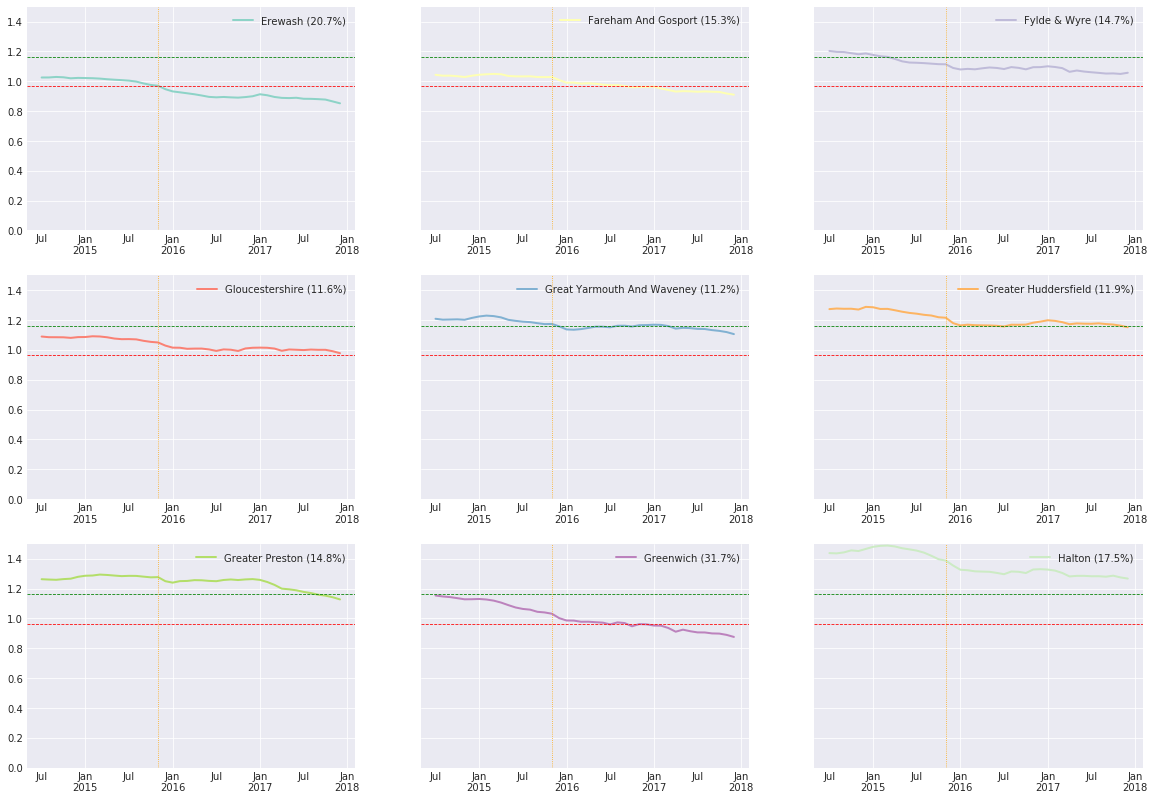

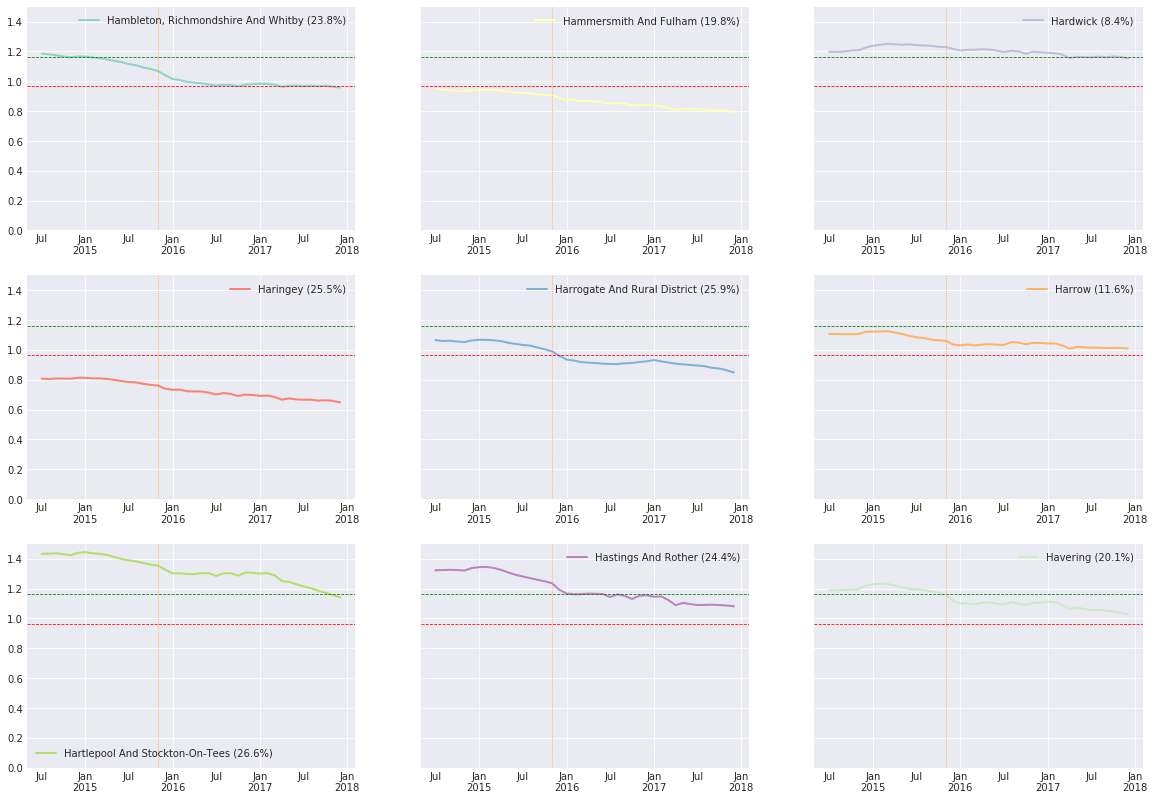

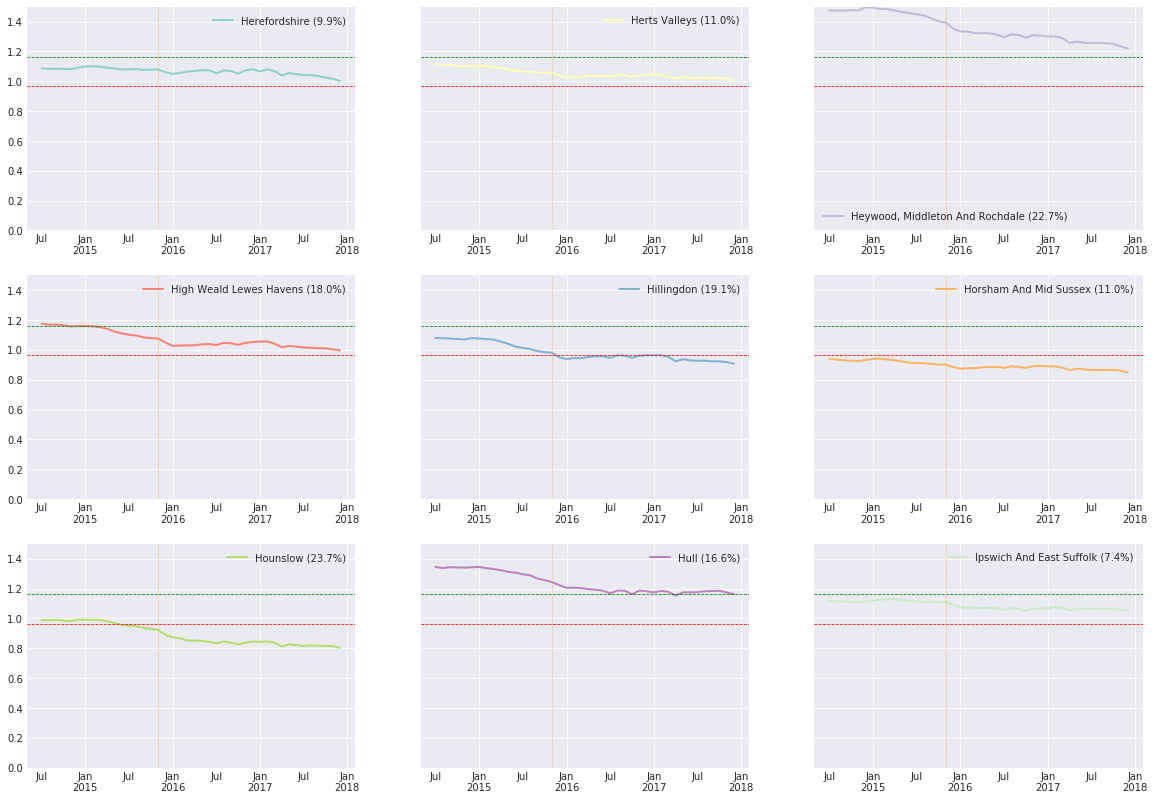

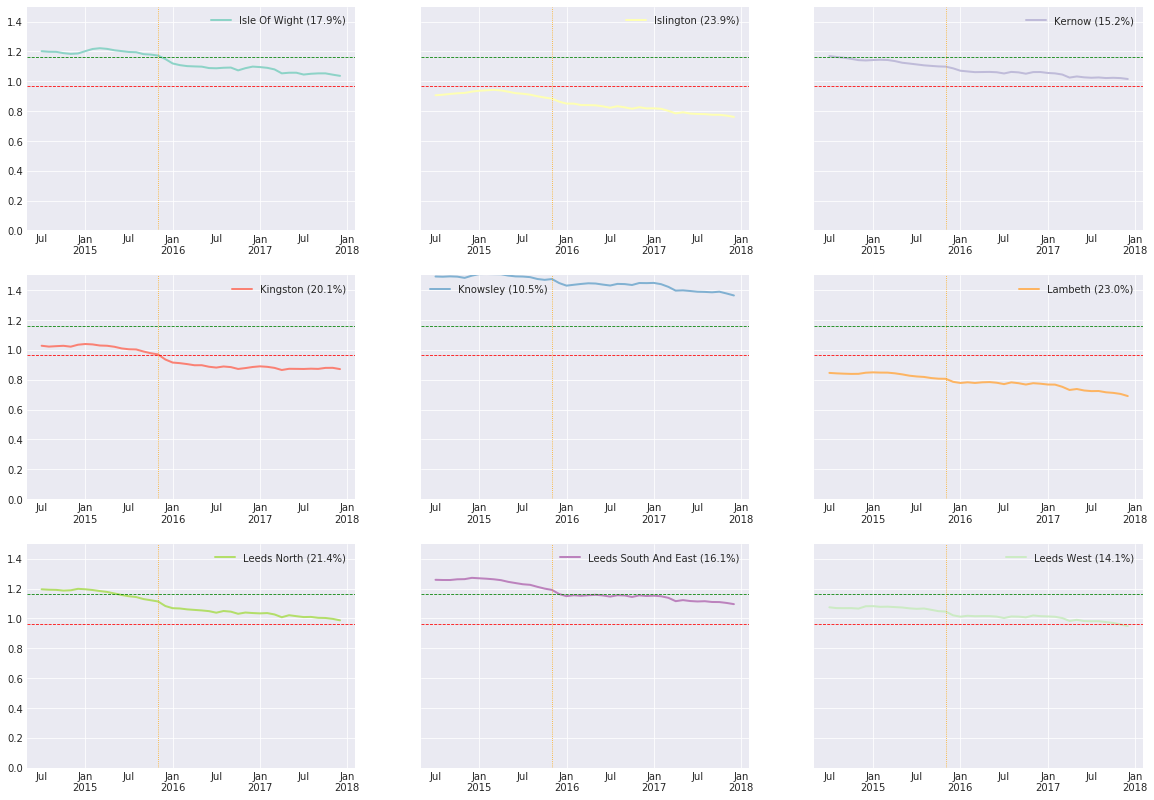

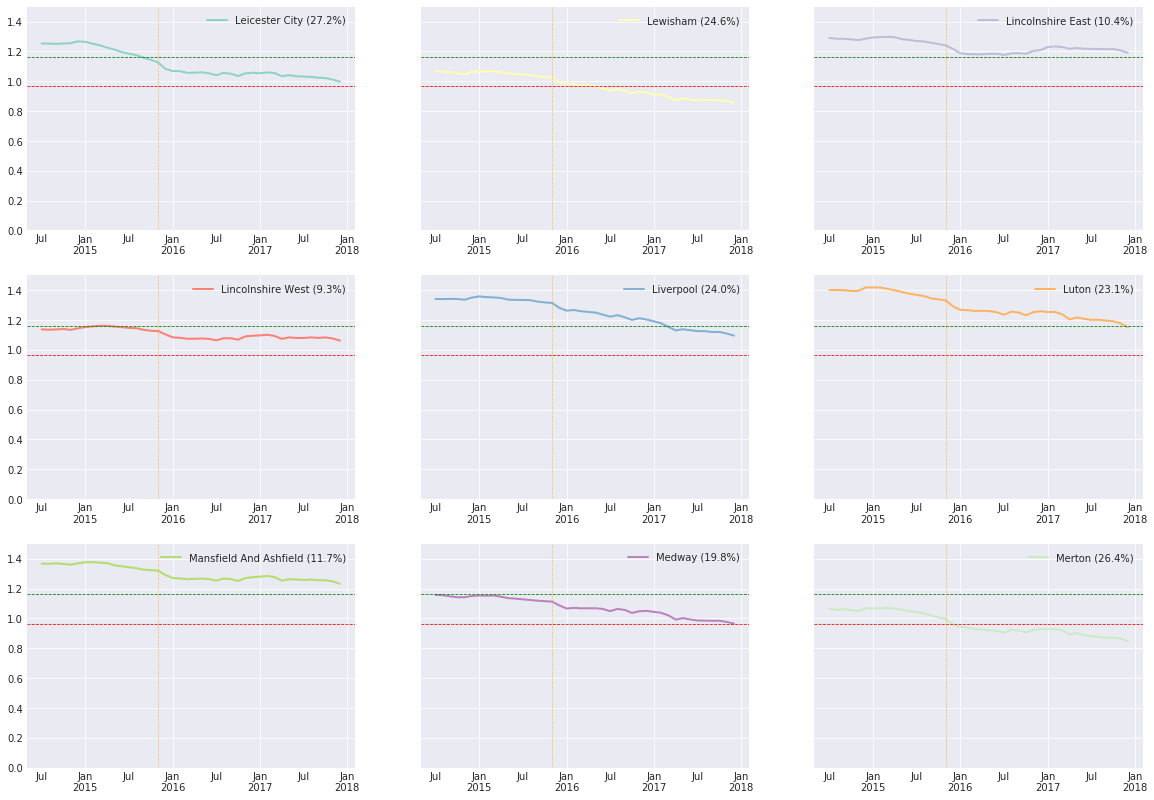

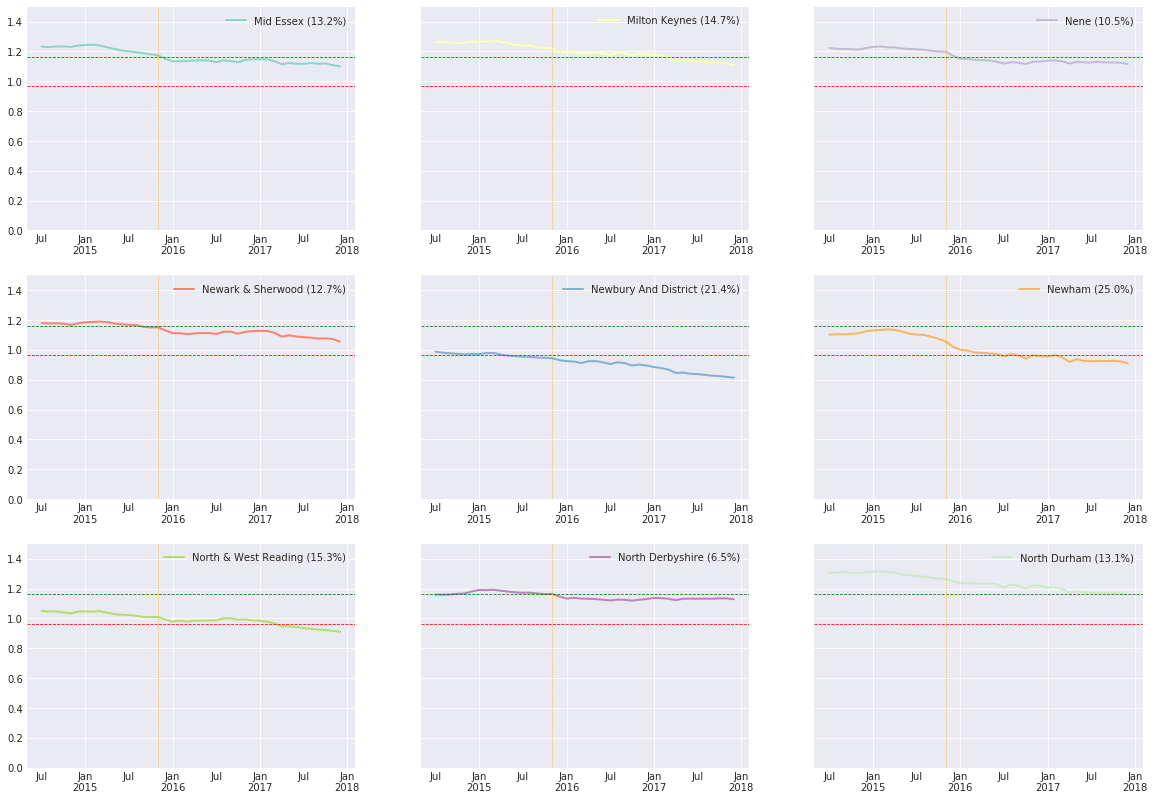

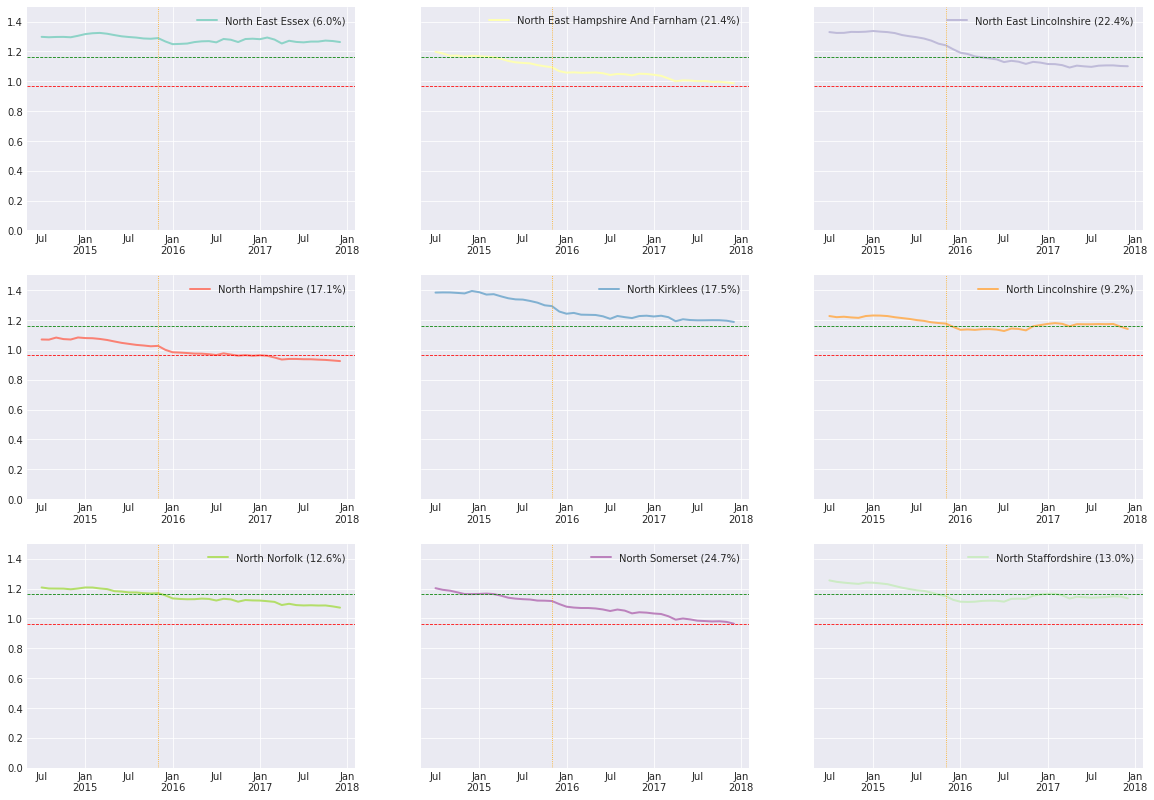

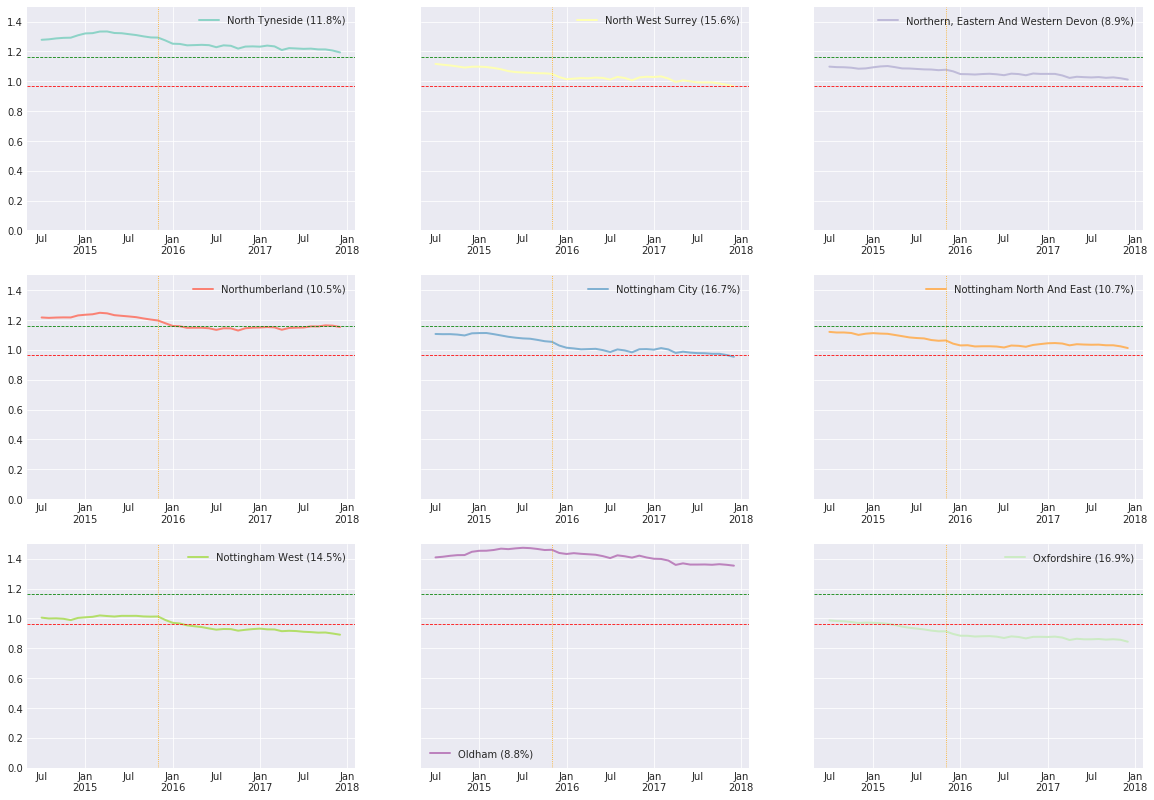

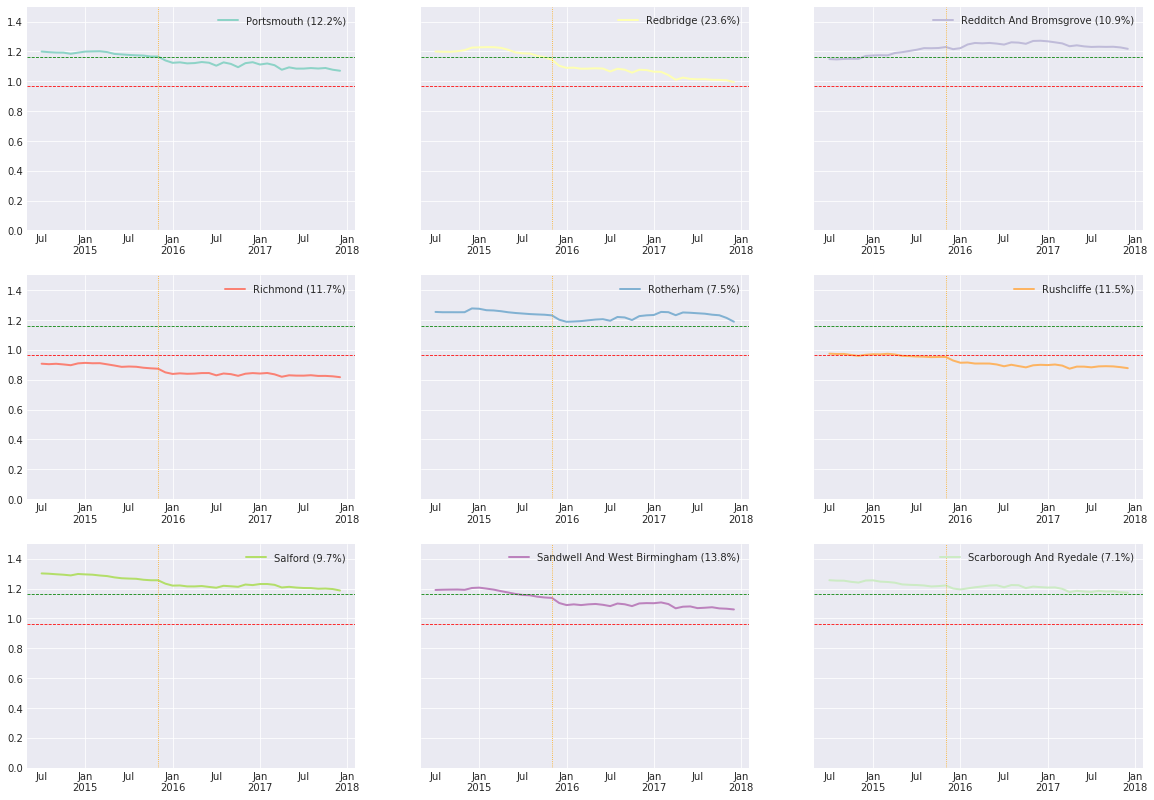

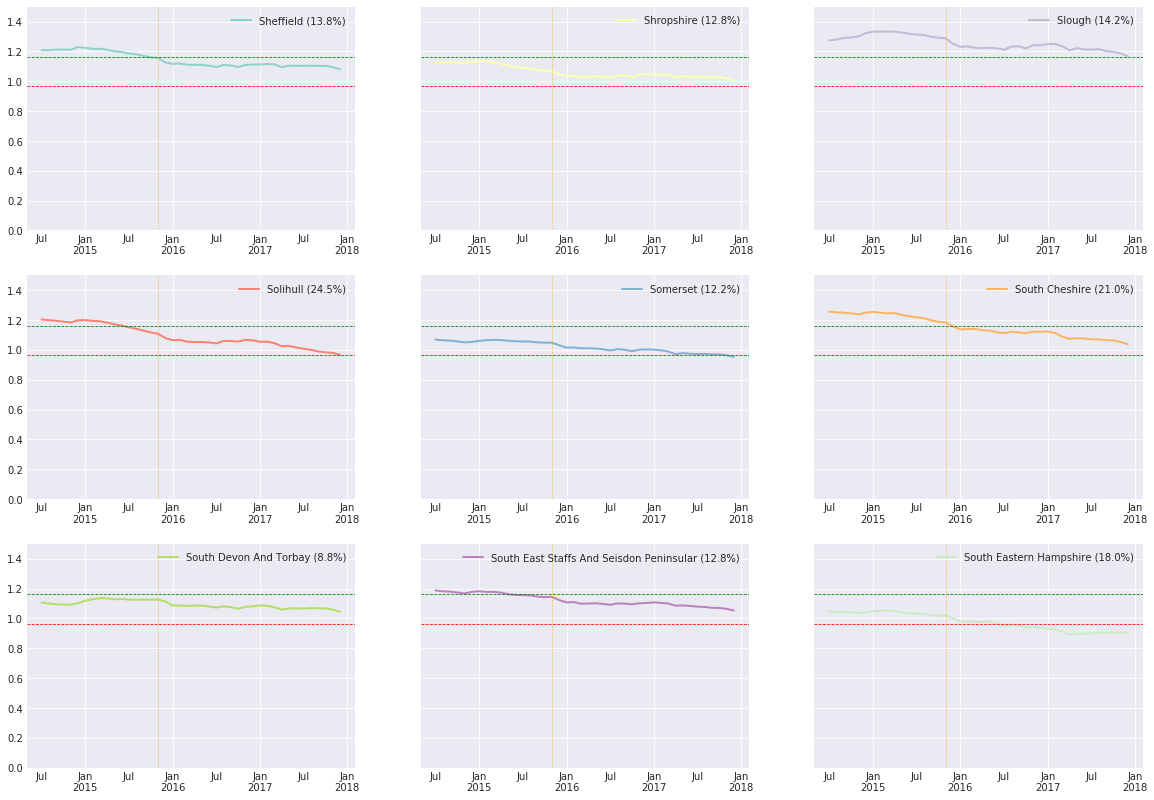

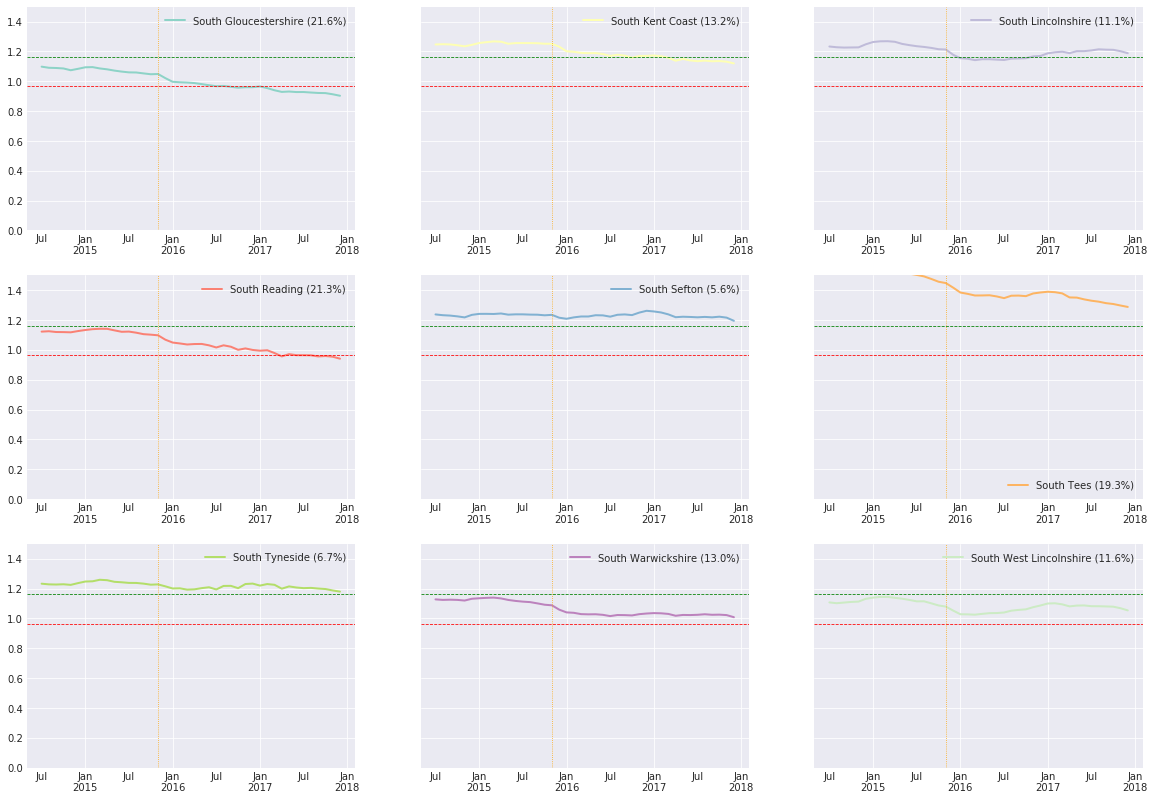

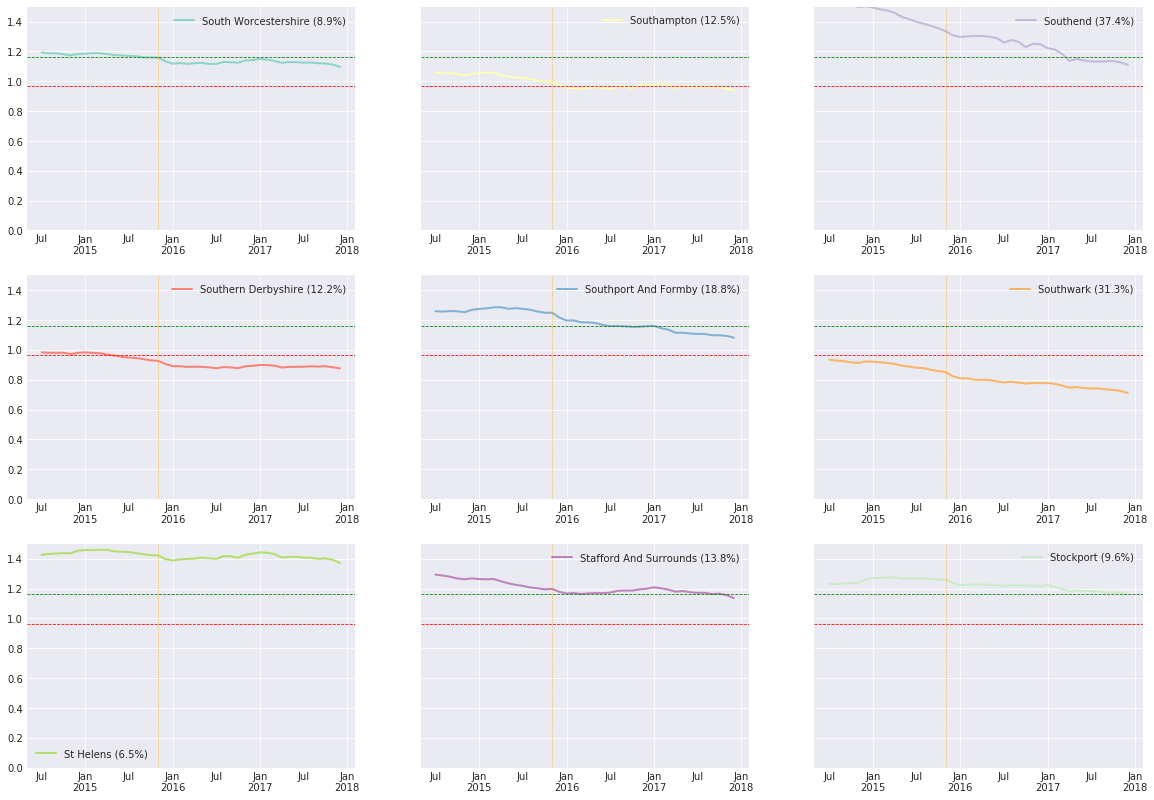

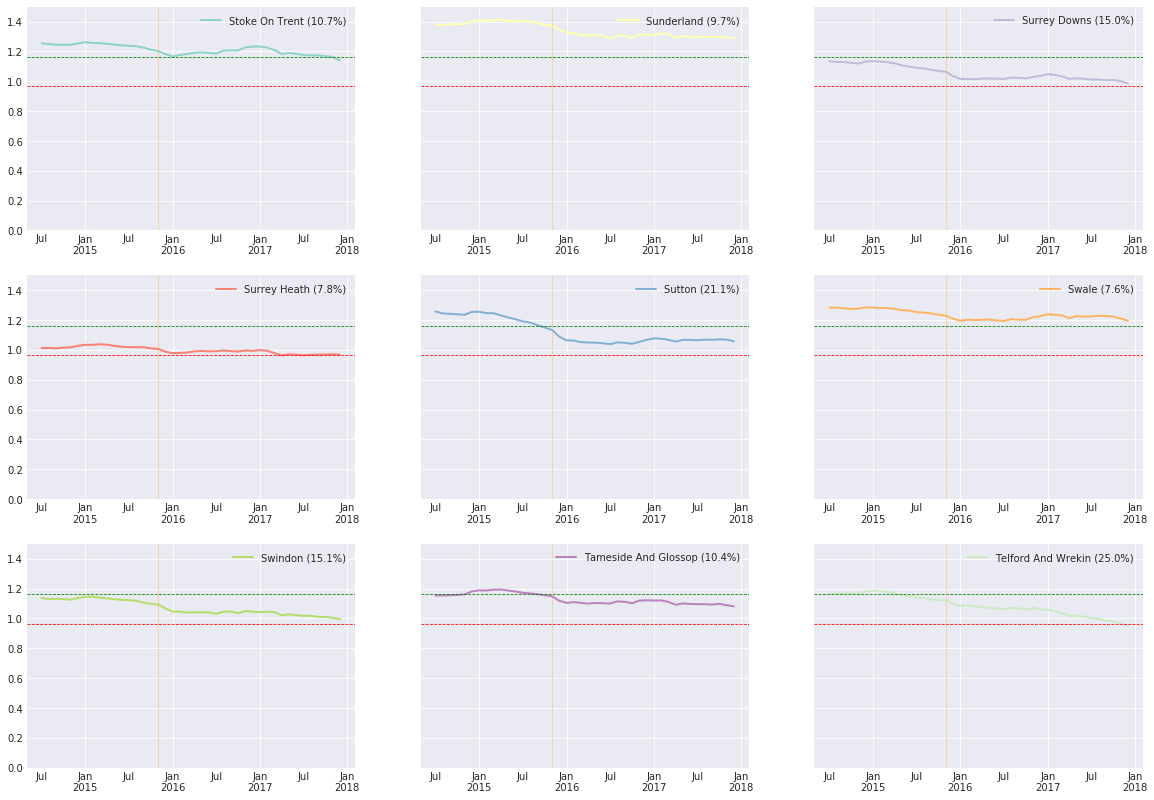

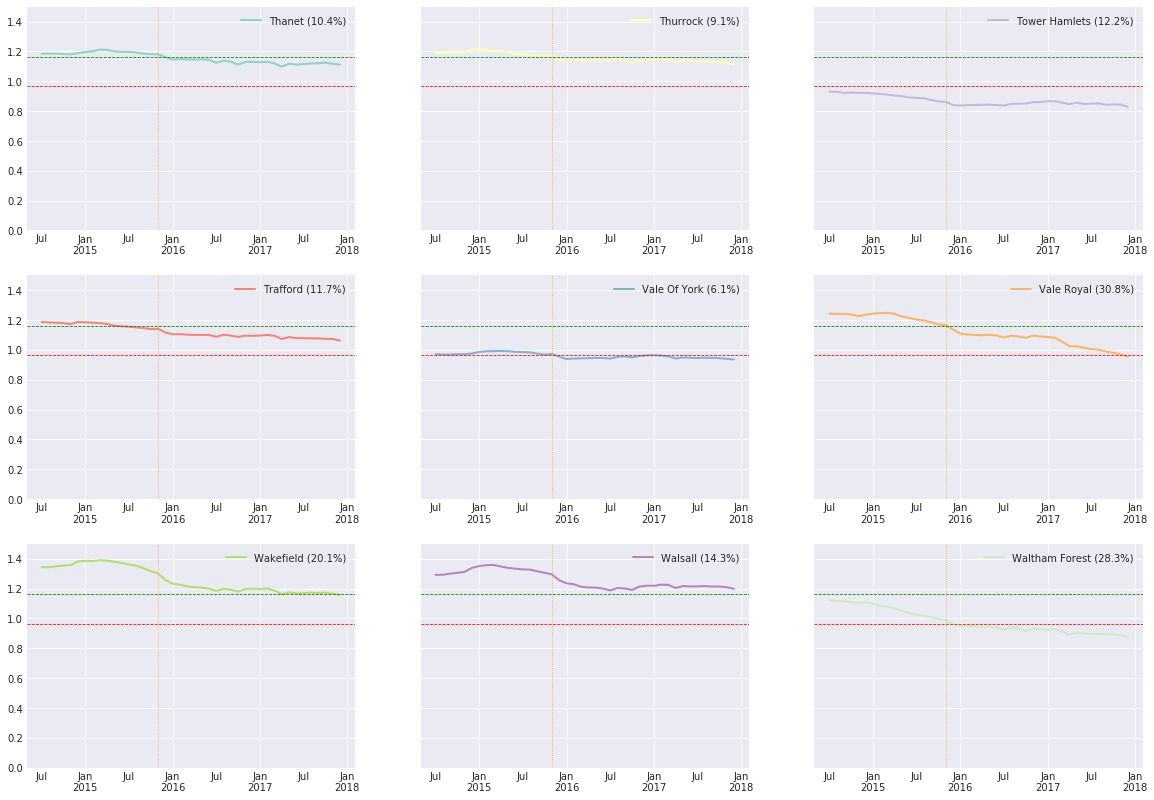

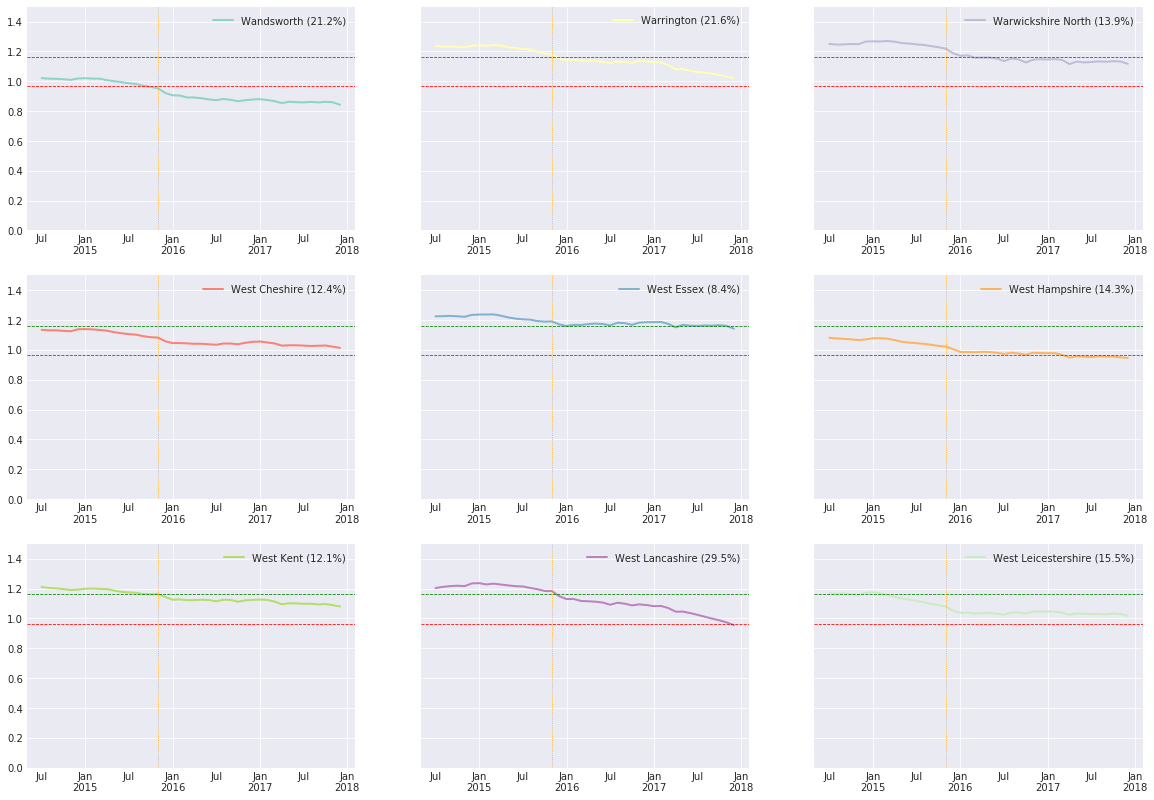

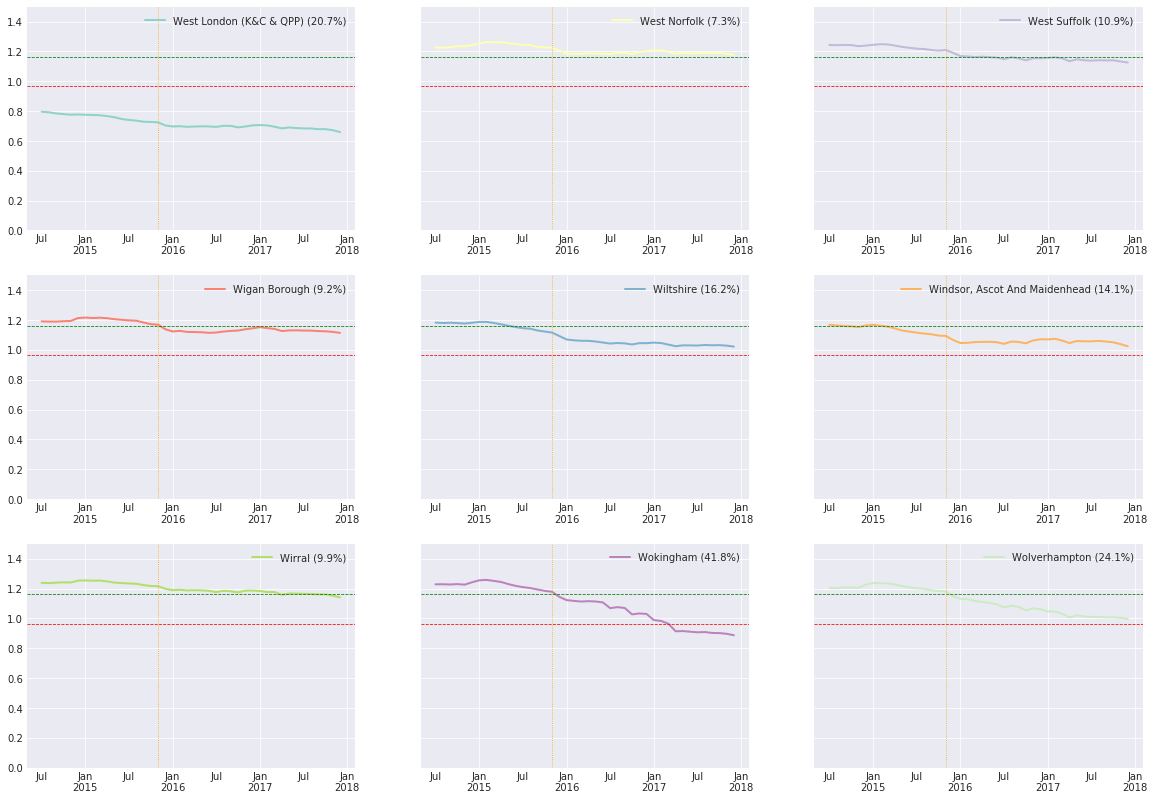

In [5]:
print ('All CCGs-Individual Charts\n')
print ('CCGs are presented with reduction levels (%max-min)')

#load reduction levels (%diff) for all ccgs
diff_ccgs=pd.read_csv('diff_2014_2017_new.csv')
diff_ccgs=diff_ccgs[['Unnamed: 0','%diff.']]
diff_ccgs=diff_ccgs.rename(index=str, columns={'Unnamed: 0':'CCG'})
diff_list=diff_ccgs['%diff.']

#add reduction levels to ccgs names in column headers
ccgs_ts_headers=ccgs_ts.columns
renaming={}
for index, value in enumerate (ccgs_ts_headers):
    value1=value+' ('+str(diff_list[index])+'%)'
    renaming[value]=value1
ccgs_ts.rename(columns=renaming, inplace=True)

start=0
end=9
for i in range (207):
    if i==end:
        df_i=ccgs_ts.iloc[:, start: end]
        with sns.axes_style("darkgrid"):
            axes=df_i.plot(subplots=True,linewidth=2,layout=(3, 3),figsize=(20, 14),fontsize=10,sharex=False,sharey=True)
            for c in axes:
                for ax in c:
                    ax.axhline(y=1.161, color='green', linestyle='--', label='2013/14 Target', linewidth=0.8) 
                    ax.axhline(y=0.965, color='red', linestyle='--', label='2018/19 Target',linewidth=0.8)
                    ax.axvline(x='Nov 2015', color='orange', linestyle='dotted', linewidth=0.8) 
                    plt.ylim((0, 1.5))
        plt.show()
        start=end
        end=end+9

In [5]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')